In [461]:
# !pip install nlp-id

In [462]:
# !pip install PySastrawi

In [463]:
# !pip show PySastrawi

In [464]:
# !pip install wordcloud
# !pip install freetype-py

In [465]:
import pandas as pd

In [466]:
# import numpy as np

# # Matriks koefisien
# A = np.array([
#     [2.00211223, 0.002578668, 0.001522622],
#     [0.002578668, 2.003148108, 2.001858858],
#     [0.001522622, 2.001858858, 2.001097597]
# ])

# # Vektor hasil
# b = np.array([1, -1, -1])

# # Menggunakan metode solve() dari numpy untuk menyelesaikan persamaan
# x = np.linalg.solve(A, b)

# # Menampilkan solusi
# print("Solusi x =", x[0])
# print("Solusi y =", x[1])
# print("Solusi z =", x[2])
# print(x)

## LoadData

In [467]:
df = pd.read_csv("./content/indihome3_merge_files_twit_fb.csv",on_bad_lines='skip')
print(f"Total Data: {len(df)}")
df

Total Data: 11825


,username,handle,postDate,responding,retweets,likes,shares,total_comments,post_url,post_id
0,Joma,@Joma01181743,2023-07-09T06:15:06.000Z,@IndiHome minn jaringane piye iki 325,NaN,NaN,NaN,NaN,NaN,NaN
1,Niken,@kekenmato,2023-07-09T03:53:55.000Z,@IndiHomeCare @IndiHome Halosaya mau tanya k...,NaN,NaN,NaN,NaN,NaN,NaN
2,chel,@Shlviaap,2023-07-09T03:53:51.000Z,Replying to @ssenaaaa_ and @IndiHome akooo juga,NaN,NaN,NaN,NaN,NaN,NaN
3,Kunyit's Delivery Service,@kikycookie,2023-07-09T03:53:06.000Z,@IndiHome kak knp wifiku error terus ilang mul...,NaN,NaN,NaN,NaN,NaN,NaN
4,Mas Dhea,@dhea_ardi,2023-07-09T03:13:55.000Z,Replying to @dhea_ardi Coba dari Kemarin Pagi ...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
11820,IndiHomeCare,IndiHomeCare,2023-04-04 00:00:00,"Agil AL'huda Sisorban Beureum Kak Agil, setela...",NaN,0.0,0.0,0.0,https://facebook.com/188631370690870,1.886314e+14
11821,profile.php,profile.php,2023-04-04 00:00:00,Kerennn min,NaN,NaN,NaN,0.0,https://facebook.com/902520680977009,9.025207e+14
11822,profile.php,profile.php,2023-06-04 00:00:00,mantul min,NaN,NaN,NaN,0.0,https://facebook.com/1593188644535094,1.593189e+15
11823,alberdsand,alberdsand,2023-04-04 00:00:00,check inbox,NaN,NaN,NaN,1.0,https://facebook.com/577789154128118,5.777892e+14


In [468]:
df["responding"]

0                   @IndiHome  minn jaringane piye iki 325
1        @IndiHomeCare @IndiHome   Halosaya mau tanya k...
2          Replying to @ssenaaaa_ and @IndiHome akooo juga
3        @IndiHome kak knp wifiku error terus ilang mul...
4        Replying to @dhea_ardi Coba dari Kemarin Pagi ...
                               ...                        
11820    Agil AL'huda Sisorban Beureum Kak Agil, setela...
11821                                          Kerennn min
11822                                           mantul min
11823                                          check inbox
11824    Halo, Kak Albert. Inboxnya akan segera kami ba...
Name: responding, Length: 11825, dtype: object

## Casefolding 

Seluruh ulasan akan di normalisasi dengan mangubah seluruh huruf besar menjadi huruf kecil

In [469]:
import re, string, unicodedata

def Case_Folding(text):
    # Mengubah text menjadi lowercase
    text = f"{text}"
    text = text.lower()
    
    # Menghapus white space
    text = re.sub('[\s]+', ' ', text)
    
    return text.lstrip(" ")

df["Text_Clean"] = df["responding"].apply(Case_Folding)
df[["Text_Clean"]].head()

,Text_Clean
0,@indihome minn jaringane piye iki 325
1,@indihomecare @indihome halosaya mau tanya klo...
2,replying to @ssenaaaa_ and @indihome akooo juga
3,@indihome kak knp wifiku error terus ilang mul...
4,replying to @dhea_ardi coba dari kemarin pagi ...


## Cleansing

In [470]:
def Cleansing(text):
    text =  text.lstrip()
    # Hapus tag atau tagar menggunakan metode sub() dari modul re
    text_cleanedat = re.sub(r'@\w+\s', '', text)
    text_cleaned = re.sub(r'#\w+\s', '', text_cleanedat)
    
    # Definisikan pola regex untuk mendeteksi link
    pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

    # Definisikan pola regex untuk mendeteksi domain
    patternDomain = r'\b[A-Za-z0-9-]+(?:\.[A-Za-z0-9-]+)*\.[A-Za-z]{2,}\b'
    
    # Hapus domain menggunakan metode sub() dari modul re
    text = re.sub(patternDomain, "", text_cleaned)

    # Hapus link menggunakan metode sub() dari modul re
    text = re.sub(pattern, "", text) 
    
    # hapus non-ascii 
    text = unicodedata.normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")
    
    # Menghapus tanda baca 
    text = re.sub(r'[^\w]|_', ' ', text)
    
    # Menghapus angka
    text = re.sub("\S*\d\S*", "", text).strip()
    text = re.sub("\b\d+\b", " ", text)
    return text.strip()

df["Text_Clean"] = df["Text_Clean"].apply(Cleansing)
# df.style.set_properties(**{'text-align': 'left'})

## Lemmatisasi

ulasan yang menggunakan kata dengan tambahan imbuhan akan diubah menjadi kata dasar pada KBBI (Kamus Besar Bahasa Indonesia)

In [471]:
from nlp_id.lemmatizer import Lemmatizer
lemmatizer = Lemmatizer()

In [472]:
df["Text_Clean"] = df["Text_Clean"].apply(lemmatizer.lemmatize)
df["Text_Clean"].head()
df["Text_Clean"].head()


0                              minn jaringane piye iki
1    halosaya mau tanya klo migrasi paket apakah ak...
2                           replying to and akooo juga
3         kak knp wifiku error terus ilang mulu jaring
4    replying to coba dari kemarin pagi kirim tekni...
Name: Text_Clean, dtype: object

## Stemming

Proses stemming tidak memperhatikan analisis morfologis kata dari suatu kalimat.

In [473]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df["Text_Clean"] = df["Text_Clean"].apply(stemmer.stem)
df["Text_Clean"].head()

0                              minn jaringane piye iki
1    halosaya mau tanya klo migrasi paket apakah ak...
2                           replying to and akooo juga
3         kak knp wifiku error terus ilang mulu jaring
4    replying to coba dari kemarin pagi kirim tekni...
Name: Text_Clean, dtype: object

## Slangword Standarization

ulasan menggunakan kosa kata tidak baku atau kata 'gaul' atau '*slang word*'. Kata-kata tidak baku tersebut akan diberikan kata baku (kata aslinya), sehingga ketika kata _tidak baku_ ditemukan, akan langsung diganti dengan kata asli sesuai dengan **KBBI**.

In [474]:
slang_dictionary = pd.read_csv(
    'https://raw.githubusercontent.com/dhino12/kamus_kbba/main/kbba.txt', 
    delimiter='\t', names=['slang', 'formal'], header=None, encoding='utf-8'
)
slang_dict = pd.Series(slang_dictionary["formal"].values, index = slang_dictionary["slang"]).to_dict()

In [475]:
slang_dictionary.to_excel("lah.xlsx")

In [476]:
def Slangwords(text):
    words = text.split()
    normalized_words = [slang_dict[word] if word in slang_dict else word for word in words]
    normalized_text = ' '.join(normalized_words)
    return normalized_text


In [477]:
df["Text_Clean"] = df["Text_Clean"].apply(Slangwords)
df["Text_Clean"] = df["Text_Clean"].str.replace("mhs", "mahasiswa")
# print(df["Text_Clean"][5])
# df.to_excel("lahx.xlsx")
df["Text_Clean"].head()

0                         admin jaringan bagaimana ini
1    halosaya mau tanya kalau migrasi paket apakah ...
2                           replying to dan akooo juga
3    kak kenapa wifiku error terus hilang melulu ja...
4    replying to coba dari kemarin pagi kirim tekni...
Name: Text_Clean, dtype: object

## Stopword Removal

ini akan menghapus seluruh kata yang dianggap tidak penting, yang mana tidak akan mempengaruhi sentimen pada kalimat. Kata yang tidak penting disini adalah kata sambung seperti, di, ke, ini, dan, dari, segala, itu.

In [478]:
from nlp_id.stopword import StopWord 
stopword = StopWord() 

In [479]:
df["Text_Clean"] = df["Text_Clean"].apply(stopword.remove_stopword)
df["Text_Clean"].head() 


0                                       admin jaringan
1         halosaya migrasi paket putus internet pasang
2                                    replying to akooo
3                kak wifiku error hilang melulu jaring
4    replying to coba kemarin pagi kirim teknisi ke...
Name: Text_Clean, dtype: object

## Unwanted Word Removal

ulasan yang terdapat nama bulan, dan tanda baca satu persatu akan diperiksa, jika terdapat kata nama bulan, atau tanda baca akan dihilangkan

In [480]:
unwanted_words = [
    'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 
    'sep', 'oct', 'nov', 'dec', 'uaddown', 'weareuad', 'lam', 'https', 'igshid', 'balas', 'replying', 'to'
]
import nltk
from nltk import word_tokenize, sent_tokenize
nltk.download("punkt")

def RemoveUnwantedWords(text):
    word_tokens = word_tokenize(text)
    filtered_words = [word for word in word_tokens if not word in unwanted_words]
    # Menghapus kata-kata yang mengandung tanda baca link
    
    return ' '.join(filtered_words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dhino_Rahmad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [481]:
df["Text_Clean"] = df["Text_Clean"].apply(RemoveUnwantedWords)
df["Text_Clean"].head()

0                                       admin jaringan
1         halosaya migrasi paket putus internet pasang
2                                                akooo
3                kak wifiku error hilang melulu jaring
4    coba kemarin pagi kirim teknisi keluh customer...
Name: Text_Clean, dtype: object

## Shortword Removal

menghapus kata-kata yang kurang dari 3 huruf

In [482]:
# Menghapus kata yang kurang dari 3 huruf
df["Text_Clean"] = df["Text_Clean"].str.findall('\w{3,}').str.join(' ')
df = df[df['Text_Clean'].str.split().str.len() >= 3]
df["Text_Clean"].head()
# df[["Text_Clean"]].rename(columns={"Text_Clean": "short_removal"}).head()


1         halosaya migrasi paket putus internet pasang
3                kak wifiku error hilang melulu jaring
4    coba kemarin pagi kirim teknisi keluh customer...
5    indihome tolong kerjasamanya uji mandiri lamba...
7                            migrasi paket mohon bantu
Name: Text_Clean, dtype: object

## Splitword

setelah ulasan sudah bersih dan padat, selanjutnya ulasan akan displit atau dipisah-pisah per kata untuk masing-masing ulasan, proses ini akan memudahkan proses perhitungan di TF-IDF tiap kata pada proses selanjutnya.

In [483]:
from nlp_id.tokenizer import Tokenizer
tokenizer = Tokenizer()

def split_word(text):
    return tokenizer.tokenize(text)

df["Text_Clean_split"] = df["Text_Clean"].apply(split_word)
df["Text_Clean_split"].head()


C:\Users\Dhino_Rahmad\AppData\Local\Temp\ipykernel_13504\2748989967.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Text_Clean_split"] = df["Text_Clean"].apply(split_word)


1    [halosaya, migrasi, paket, putus, internet, pa...
3         [kak, wifiku, error, hilang, melulu, jaring]
4    [coba, kemarin, pagi, kirim, teknisi, keluh, c...
5    [indihome, tolong, kerjasamanya, uji, mandiri,...
7                       [migrasi, paket, mohon, bantu]
Name: Text_Clean_split, dtype: object

## Labeling

Melakukan pelabelan positif / negatif

In [484]:
## Memberi label pada data ulasan
### Pada dataset belum terdapat label positif dan negatif pada ulasan, sehingga perlu dilakukan pelabelan.

## Daftar kosa kata positif Bahasa Indonesia
df_positive = pd.read_csv("https://raw.githubusercontent.com/dhino12/ID-NegPos/main/positive.txt", sep="\t")
list_positive_dict = list(df_positive.iloc[::, 0])

## Daftar kosa kata negatif Bahasa Indonesia
df_negative = pd.read_csv("https://raw.githubusercontent.com/dhino12/ID-NegPos/main/negative.txt", sep="\t")
list_negative_dict = list(df_negative.iloc[::, 0]) 

# Memastikan kedua daftar memiliki panjang yang sama
min_length = min(len(list_positive_dict), len(list_negative_dict))
list_positive = list_positive_dict[:min_length]
list_negative = list_negative_dict[:min_length]

# Membuat DataFrame
df_positive_negative = pd.DataFrame({"Kosa Kata Positif": list_positive, "Kosa Kata Negatif": list_negative})

# Menampilkan DataFrame
df_positive_negative

,Kosa Kata Positif,Kosa Kata Negatif
0,absah,adiktif
1,absolut,adu
2,acuan,adu domba
3,afdol,aduh
4,akademisi,ahoker
...,...,...
1676,boleh juga,lapor
1677,perbaiki,lara
1678,best,larang
1679,special,lari


In [485]:
# Menghitung kata-kata positif / negatif pada teks dan menentukan sentimennya
def sentiment_analysis_lexicon_indonesia(text):
    positive_words = []
    negative_words = []
    neutral_words = []
    score = 0
    for word in text:
        if (word in list_positive_dict):
            score += 1
            positive_words.append(word)
        if (word in list_negative_dict):
            score -= 1
            negative_words.append(word)
        if (word not in list_positive_dict and word not in list_negative_dict): 
            neutral_words.append(word)

    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    
    return score, polarity, positive_words, negative_words

result = df["Text_Clean_split"].apply(sentiment_analysis_lexicon_indonesia)
result = list(zip(*result))
df["polarity_score"] = result[0]
df["polarity"] = result[1]
print(f"neutral\t{len(pd.DataFrame(df[df.polarity == 'neutral']))}")
df = df[df.polarity != "neutral"]


list_positive_words = result[2]
list_negative_words = result[3]

df_positive = df[df["polarity"] == "positive"]
df_negative = df[df["polarity"] == "negative"]

df_positive.to_excel("positive.xlsx")
df_negative.to_csv("negative.csv")
df.polarity.value_counts()
# print(df_positive)

C:\Users\Dhino_Rahmad\AppData\Local\Temp\ipykernel_13504\64471924.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["polarity_score"] = result[0]
C:\Users\Dhino_Rahmad\AppData\Local\Temp\ipykernel_13504\64471924.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["polarity"] = result[1]


neutral	2764


positive    3725
negative    1839
Name: polarity, dtype: int64

## TopWords

In [486]:
def top_words(hasil_kata_positive, hasil_kata_negative):
    all_positive_words = [word for sublist in hasil_kata_positive for word in sublist]
    all_negative_words = [word for sublist in hasil_kata_negative for word in sublist]
    positive_freq = pd.Series(all_positive_words).value_counts().reset_index().rename(columns={
        'index': 'Positive Word', 
        0: 'Frequency'
    })
    negative_freq = pd.Series(all_negative_words).value_counts().reset_index().rename(columns={
        'index': 'Negative Word', 
        0: 'Frequency'
    })
    top_20_positive = positive_freq.head(11)
    top_20_negative = negative_freq.head(11)
    return top_20_positive, top_20_negative
        
top_kata_positive, top_kata_negative = top_words(list_positive_words, list_negative_words)
result3 = pd.DataFrame(top_kata_positive)
result4 = pd.DataFrame(top_kata_negative)

concate_result = pd.concat([result3, result4], axis=1)
concate_result

,Positive Word,Frequency,Negative Word,Frequency
0,bantu,1924,lambat,586
1,kasih,1864,tagih,510
2,lunas,515,lapor,424
3,konfirmasi,378,ganggu,294
4,ayo,343,kendala,293
5,cepat,291,mati,232
6,maaf,251,henti,219
7,stabil,239,putus,207
8,pilih,216,terlambat,105
9,solusi,209,keluh,102


# Circle Charts

   untuk memperjelas perbandingan antara positif dan negatif maka divisualisasikan kedalam bentuk pie chart.

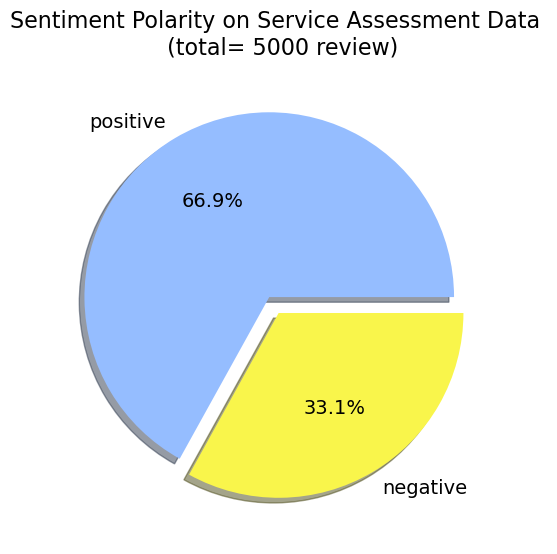

In [487]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize= (6, 6))
sizes = [count for count in df["polarity"].value_counts()]
labels = list(df["polarity"].value_counts().index)
# myexplode = (0.1, 0,0)
myexplode = (0.1, 0)
colors = ["#95BDFF", "#F9F54B", "#F9F54B", "#D9F542"]
ax.pie(x = sizes, labels = labels, colors = colors, autopct = '%1.1f%%', explode = myexplode, textprops= {"fontsize": 14}, shadow=True)
ax.set_title("Sentiment Polarity on Service Assessment Data \n (total= 5000 review)", fontsize = 16, pad = 20)
plt.show()

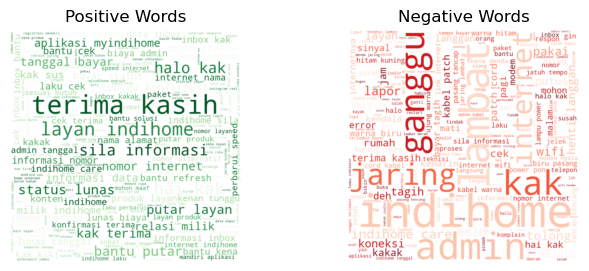

In [488]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_positive = ' '.join(df_positive['Text_Clean'])
text_negative = ' '.join(df_negative['Text_Clean'])

wordcloud_positive = WordCloud(width=800, height=800, background_color='white', colormap='Greens').generate(text_positive)
wordcloud_negative = WordCloud(width=800, height=800, background_color='white', colormap='Reds').generate(text_negative)

fig, axs = plt.subplots(1, 2, figsize=(8, 3))
axs[0].imshow(wordcloud_positive, interpolation='bilinear')
axs[0].set_title('Positive Words')
axs[0].axis('off')

axs[1].imshow(wordcloud_negative, interpolation='bilinear')
axs[1].set_title('Negative Words')
axs[1].axis('off')

plt.show()

## TF-IDF (term frequency-inverse document frequency)

TF-IDF digunakan untuk mengubah data teks menjadi vektor namun dengan memperhatikan apakah sebuah kata tersebut cukup informatif atau tidak

In [489]:
from sklearn.feature_extraction.text import TfidfVectorizer

df["Text_Clean"] = df["Text_Clean"].astype(str)
tfidf = TfidfVectorizer()
review = df["Text_Clean"].values.tolist()
tfidf_vector = tfidf.fit(review)
X = tfidf_vector.transform(review)
y = df["polarity"]

print(X[0:2])

  (0, 4747)	0.33851865293624656
  (0, 4344)	0.2993042381665252
  (0, 4291)	0.32901677084331127
  (0, 3715)	0.4487062444828579
  (0, 2557)	0.2052050038198207
  (0, 2108)	0.6664260436860358
  (1, 6284)	0.6114549503747807
  (1, 3634)	0.39500877620641883
  (1, 2800)	0.13923509980266519
  (1, 2681)	0.2522062930615384
  (1, 2228)	0.4413846442044974
  (1, 1667)	0.4384929634163473


Train-Validation split dapat dilakukan dengan menjalankan potongan kode di bawah. 
Persentase pembagian data training dan data validasi dapat ditentukan dengan mengubah nilai parameter train_size.

In [490]:
from pandas.core.common import random_state
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 0)

data_latih = len(y_train)
data_test = len(y_test)
all_data = len(y)

print("Total Keseluruhan data: ", all_data)
print("Total Data Latih: ", data_latih)
print("Total Data Test: ", data_test)

Total Keseluruhan data:  5564
Total Data Latih:  5007
Total Data Test:  557


## Support Vector Machine

Penjelasan lebih lengkap mengenai penggunaan Support Vector Machine dapat dilihat pada <br> 
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html <br>
Saat menggunakan model SVM, beberapa parameter dapat diubah sesuai dengan kebutuhan, antara lain kernel (linear, polynomial, rbf), nilai C, dan nilai Gamma.

In [491]:
# SVM dengan kernel Linear, nilai parameter C dapat diubah juga.
from sklearn.svm import SVC
from sklearn import metrics

svmLinear = SVC(
  kernel = 'linear',
      C = 1)

svmLinear.fit(X_train, y_train)
y_pred = svmLinear.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score_svmlk = score
print("Akurasi dengan menggunakan Support Vector Machine Linear Kernel: ", score)

Akurasi dengan menggunakan Support Vector Machine Linear Kernel:  0.9712746858168761


In [492]:
classes = svmLinear.classes_
classes

array(['negative', 'positive'], dtype=object)

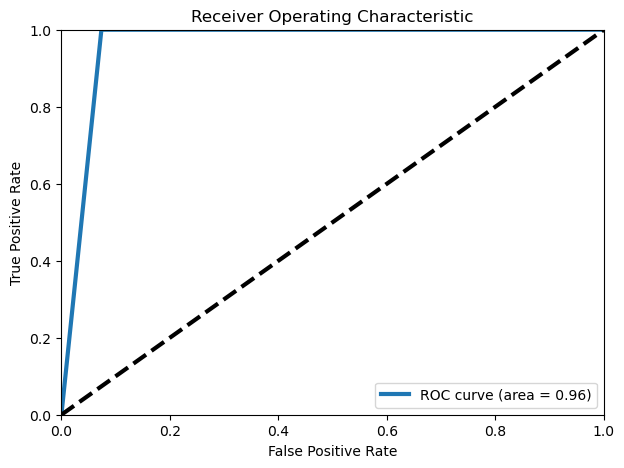

In [493]:
from sklearn import metrics
from sklearn.preprocessing import label_binarize

# Mengubah label "neutral" menjadi kelas yang tidak diminati
y_test_binary = label_binarize(y_test, classes=['negative', 'positive'])
y_pred_binary = label_binarize(y_pred, classes=['negative', 'positive'])

# Menghitung skor AUC-ROC
fpr, tpr, _ = metrics.roc_curve(y_test_binary.ravel(), y_pred_binary.ravel())
roc_auc = metrics.auc(fpr, tpr)

# Plot kurva AUC-ROC
plt.figure(figsize=[7,5])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=3)
plt.plot([0, 1], [0, 1], 'k--', linewidth=3)  # Garis diagonal
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [494]:
from sklearn.metrics import classification_report
print("Support Vector Clasification Report: \n", classification_report(y_test, y_pred))

Support Vector Clasification Report: 
               precision    recall  f1-score   support

    negative       1.00      0.93      0.96       217
    positive       0.96      1.00      0.98       340

    accuracy                           0.97       557
   macro avg       0.98      0.96      0.97       557
weighted avg       0.97      0.97      0.97       557



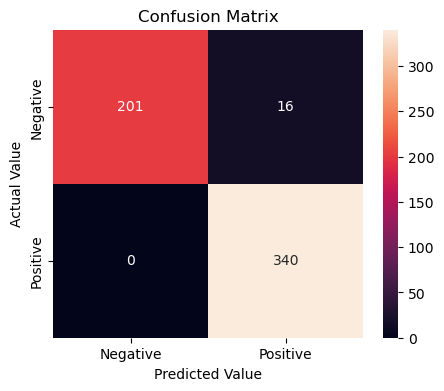

Rumus Akurasi
(TP + TN) / (TP + TN + FP + FN) = Accuracy
Rumus Akurasi
(340 + 201) / (340 + 201 + 16 + 0) = 0.9712746858168761
True Positive: 340
True Negative: 201
False Positive: 16
False Negative: 0


In [495]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Negative", "Positive"], columns=["Negative", "Positive"])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel("Actual Value")
plt.xlabel("Predicted Value")
plt.show()

accuracyData = (cm[1,1] + cm[0,0]) / (cm[1,1] + cm[0,0] + cm[0,1] + cm[1,0])
print("Rumus Akurasi")
print("(TP + TN) / (TP + TN + FP + FN) = Accuracy")
print("Rumus Akurasi")
print(f"({cm[1,1]} + {cm[0,0]}) / ({cm[1,1]} + {cm[0,0]} + {cm[0,1]} + {cm[1,0]}) = {accuracyData}")
print(f"True Positive: {cm[1,1]}")
print(f"True Negative: {cm[0,0]}")
print(f"False Positive: {cm[0,1]}")
print(f"False Negative: {cm[1,0]}")


## Naïve Bayes

In [496]:
from sklearn import naive_bayes
from sklearn import metrics

nb = naive_bayes.BernoulliNB()

nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score_nb = score
print("Akurasi dengan menggunakan Naive Bayes: ", score)

Akurasi dengan menggunakan Naive Bayes:  0.895870736086176


In [497]:
from sklearn.metrics import classification_report
print("Naive Bayes Classification Report: \n", classification_report(y_test, y_pred))

Naive Bayes Classification Report: 
               precision    recall  f1-score   support

    negative       0.84      0.90      0.87       217
    positive       0.93      0.89      0.91       340

    accuracy                           0.90       557
   macro avg       0.89      0.90      0.89       557
weighted avg       0.90      0.90      0.90       557



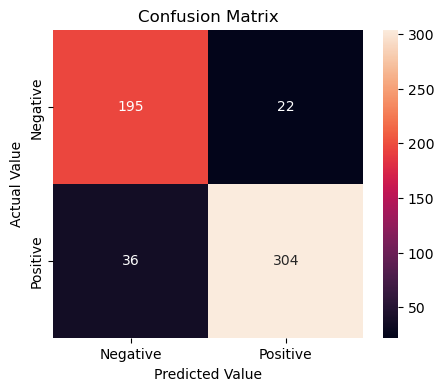

Rumus Akurasi
(TP + TN) / (TP + TN + FP + FN) = Accuracy
Rumus Akurasi
(304 + 195) / (304 + 195 + 22 + 36) = 0.895870736086176
True Positive: 304
True Negative: 195
False Positive: 22
False Negative: 36


In [498]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Negative", "Positive"], columns=["Negative", "Positive"])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel("Actual Value")
plt.xlabel("Predicted Value")
plt.show()

accuracyData = (cm[1,1] + cm[0,0]) / (cm[1,1] + cm[0,0] + cm[0,1] + cm[1,0])
print("Rumus Akurasi")
print("(TP + TN) / (TP + TN + FP + FN) = Accuracy")
print("Rumus Akurasi")
print(f"({cm[1,1]} + {cm[0,0]}) / ({cm[1,1]} + {cm[0,0]} + {cm[0,1]} + {cm[1,0]}) = {accuracyData}")

print(f"True Positive: {cm[1,1]}")
print(f"True Negative: {cm[0,0]}")
print(f"False Positive: {cm[0,1]}")
print(f"False Negative: {cm[1,0]}")


## Save as .pkl
untuk dideploy dalam bentuk aplikasi streamlit dan upload kedalam streamlit

In [499]:
#import ke pickle
import pickle

pickle.dump((nb, tfidf), open('model_svm.pkl','wb'))

In [502]:
new_features = tfidf.transform(["bagus"])
y_pred = nb.predict(new_features)
print(y_pred)

['negative']
